# Notebook for training our mandatory network
This notebook is for training our mandatory network. The different hyperparameter choices were made using a greedy approach. First, all hyperparameters for the training data were determined using `evaluation/train_evaluation.py`, then all network hyperparameters were chosen using a hyperparameter search in `evaluation/network_evaluation.py` and then the best postprocessor window using `evaluation/postprocessor_evaluation.py`. For more information on how we made those choices see `evaluation/visualizations.ipynb`.

In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import load_data, sample_data
from src.constants import Paths, features, class_names, coords_features
from src.postprocessor import Postprocessor
from src.preprocessor import Preprocessor
from src.performance_calculator import calculate_scores

from framework.network import NeuralNetwork
from framework.layers import FullyConnectedLayer
from framework.activation_layers import Sigmoid, Softmax, ReLU
from framework.optimizer import SGD
from framework.losses import CrossEntropy
from framework.input_layer import DefaultInputLayer
from framework.utils import one_hot_vector_to_classes

np.random.seed(42)

In [2]:
# Initialize processors
preproc = Preprocessor(to_delta=features, to_drop=coords_features)
window_size = 12
class_thresholds = {"swipe_left": 0.4, "swipe_right": 0.4, "rotate": 0.6}
postproc = Postprocessor(window_size=window_size, thresholds=class_thresholds, idle_thresh=0.8)

In [3]:
# Load the training data and preprocess it
x_train, y_train = load_data(paths=[Paths.DATA_MAND_TRAIN_DATA, Paths.DATA_MAND_TRAIN_DATA / "augmented", Paths.DATA_OTHER_MAND_DATA], preprocessor=preproc)
# Load the validation data and preprocess it
x_val, y_val = load_data(paths=[Paths.DATA_MAND_VAL_DATA], preprocessor=preproc)
gt = one_hot_vector_to_classes(y_val, class_names, sparse=False)

In [4]:
# Sample idle because of class imbalance
x_train, y_train = sample_data(x_train, y_train)

In [5]:
layers = [
    FullyConnectedLayer(x_train.shape[1], 64),
    ReLU(),
    FullyConnectedLayer(64, 64),
    Sigmoid(),
    FullyConnectedLayer(64, 32),
    Sigmoid(),
    FullyConnectedLayer(32, len(class_names)),
    Softmax(),
]
nn = NeuralNetwork(DefaultInputLayer(), layers)

In [6]:
results = []
# Train the Model and compute the score after every epoch to determine the best number of epochs.
for i in range(100):
    SGD.update(
        nn=nn,
        loss=CrossEntropy(),
        lr=0.01,
        epochs=1,
        data=(x_train, y_train),
    )
    # Test the trained model on so far unseen data
    predictions = nn(x_val)
    events = postproc.postprocess(predictions, batch=True)
    results.append(calculate_scores(events, gt, verbose=False))

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

training:   0%|          | 0/1 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

In [7]:
# Determine the best number of epochs
best_epoch = np.argmax(results) + 1

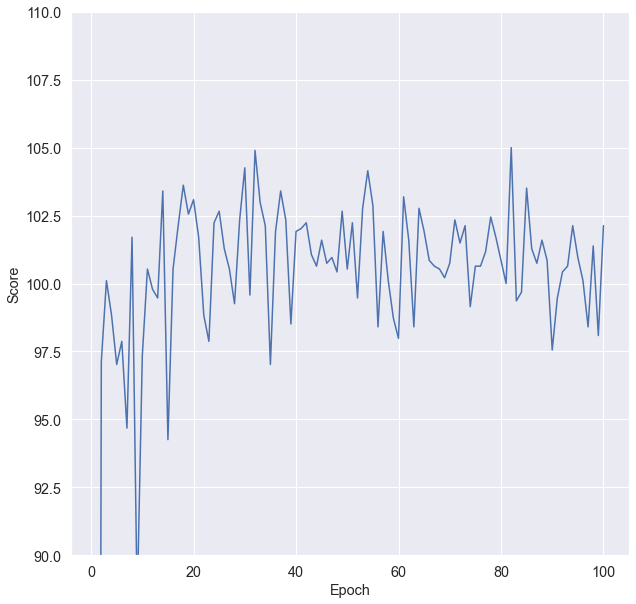

In [8]:
# Shows the score on the validation dataset for every epoch.
sns.set(rc={"figure.figsize": (10, 10)})
sns.lineplot(x=list(range(1, 101)), y=results)
plt.ylim(90, 110)
plt.xticks(fontsize="large")
plt.yticks(fontsize="large")
plt.xlabel("Epoch", fontsize="large")
plt.ylabel("Score", fontsize="large")
plt.show()

In [9]:
# Train the model with different initializations and choose the best version as final model
max_score, best_model, best_seed = 0, None, 42
# Random Seeds
for i in [42, 22, 1999, 73, 7, 41, 2022, 1, 0]:
    np.random.seed(i)
    layers = [
        FullyConnectedLayer(x_train.shape[1], 64),
        ReLU(),
        FullyConnectedLayer(64, 64),
        Sigmoid(),
        FullyConnectedLayer(64, 32),
        Sigmoid(),
        FullyConnectedLayer(32, len(class_names)),
        Softmax(),
    ]
    curr_nn = NeuralNetwork(DefaultInputLayer(), layers)
    SGD.update(
        nn=curr_nn,
        loss=CrossEntropy(),
        lr=0.01,
        epochs=best_epoch,
        data=(x_train, y_train),
    )
    # Test the trained model on so far unseen data
    predictions = curr_nn(x_val)
    events = postproc.postprocess(predictions, batch=True)
    curr_score = calculate_scores(events, gt, verbose=False)
    print(f"Score with seed {i}: {curr_score}")
    if curr_score > max_score:
        max_score = curr_score
        best_model = curr_nn
        best_seed = i
max_score

training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 42: 101.48936170212765


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 22: 101.17021276595743


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 1999: 102.34042553191487


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 73: 96.8085106382979


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 7: 97.0212765957447


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 41: 103.61702127659575


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 2022: 104.78723404255321


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 1: 98.08510638297875


training:   0%|          | 0/82 [00:00<?, ?it/s]

Prediction:   0%|          | 0/14451 [00:00<?, ?it/s]

Score with seed 0: 104.14893617021278


104.78723404255321

In [12]:
# As last step, train on the validation dataset to get even better results for the test dataset
SGD.update(
    nn=best_model,
    loss=CrossEntropy(),
    lr=0.01,
    epochs=10,
    data=(x_val, y_val),
)

training:   0%|          | 0/10 [00:00<?, ?it/s]

(0.936756158317188, 0.1691902898399562)

In [13]:
best_model.save(Paths.MODELS / "network.pkl")
preproc.save_pca(Paths.MODELS / "pca.pkl")